<a href="https://colab.research.google.com/github/tejasrinivas20/FastF1_EDA/blob/main/fastf1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Formula 1
 Often referred to as F1, is the pinnacle of motorsport, known for its high-speed racing, cutting-edge technology, and global fanbase. Established in 1950, it has a rich history rooted in Europe but has since expanded to include races worldwide. F1 cars are finely-tuned engineering marvels, reaching speeds of over 200 mph, and races are held on iconic tracks like Monza, Silverstone, and Monaco. The sport has seen legendary drivers like Michael Schumacher and Lewis Hamilton, and it continues to captivate enthusiasts with its blend of speed, strategy, and drama, making it one of the most popular and prestigious racing series in the world.

This is me trying to Data Analysis (EDA) on F1 Data sourced from this [Kaggle dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?resource=download&select=results.csv)

In [29]:
# importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
results_df = pd.read_csv('../dataset/results.csv')
constructors_df = pd.read_csv('../dataset/constructors.csv')
drivers_df = pd.read_csv('../dataset/drivers.csv')
races_df = pd.read_csv('../dataset/races.csv')

In [31]:
# Dropping unwanted Columns

columns_to_drop = ['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

races_df.drop(columns=columns_to_drop, inplace=True)

In [32]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url'], dtype='object')

In [33]:
drivers_df.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [34]:
constructors_df.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

In [35]:
results_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [36]:
# Merging all the dataframes into a single dataframe

final_df = pd.merge(results_df, races_df[['raceId','year','name','round']], on ='raceId',how='left')
final_df = pd.merge(final_df, drivers_df[['driverId','driverRef','nationality']], on = 'driverId',how='left')
final_df = pd.merge(final_df, constructors_df[['constructorId','name','nationality']], on ='constructorId',how='left')

In [37]:
final_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [38]:
# Dropping unwanted columns from final DataFrame

final_df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId', 'raceId', 'driverId', 'constructorId'],axis=1,inplace=True)

In [39]:
# Renaming columns into more appropriate and understandable names

if 'rank' in final_df.columns and 'name_x' in final_df.columns and 'nationality_x' in final_df.columns and 'name_y' in final_df.columns and 'nationality_y' in final_df.columns and 'driverRef' in final_df.columns:
    final_df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'}, inplace=True)

In [40]:
final_df.columns

Index(['grid', 'positionOrder', 'points', 'time', 'milliseconds',
       'fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'year',
       'gp_name', 'round', 'driver', 'driver_nationality', 'constructor_name',
       'constructor_nationality'],
      dtype='object')

In [42]:
# Sorting values based on year
final_df=final_df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [43]:
# Replacing '\N' values with 'NaN' from NumPy

final_df.time.replace('\\N',np.nan,inplace=True)
final_df.milliseconds.replace('\\N',np.nan,inplace=True)
final_df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
final_df.fastestLapTime.replace('\\N',np.nan,inplace=True)
final_df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [44]:
# Changing datatype into float for better calculation

final_df.fastestLapSpeed=final_df.fastestLapSpeed.astype(float)
final_df.milliseconds=final_df.milliseconds.astype(float)
final_df.fastest_lap_rank=final_df.fastest_lap_rank.astype(float)

In [45]:
final_df.reset_index(drop=True,inplace=True)

In [46]:
print(final_df.shape)

(26080, 15)


In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     26080 non-null  int64  
 1   positionOrder            26080 non-null  int64  
 2   points                   26080 non-null  float64
 3   time                     7251 non-null   object 
 4   milliseconds             7250 non-null   float64
 5   fastest_lap_rank         7831 non-null   float64
 6   fastestLapTime           7615 non-null   object 
 7   fastestLapSpeed          7615 non-null   float64
 8   year                     26080 non-null  int64  
 9   gp_name                  26080 non-null  object 
 10  round                    26080 non-null  int64  
 11  driver                   26080 non-null  object 
 12  driver_nationality       26080 non-null  object 
 13  constructor_name         26080 non-null  object 
 14  constructor_nationalit

In [48]:
final_df.head()

,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,2023,Bahrain Grand Prix,1,max_verstappen,Dutch,Red Bull,Austrian
1,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,2023,Bahrain Grand Prix,1,perez,Mexican,Red Bull,Austrian
2,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,2023,Bahrain Grand Prix,1,alonso,Spanish,Aston Martin,British
3,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,2023,Bahrain Grand Prix,1,sainz,Spanish,Ferrari,Italian
4,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,2023,Bahrain Grand Prix,1,hamilton,British,Mercedes,German


In [49]:
# Setting seaborn palette

sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

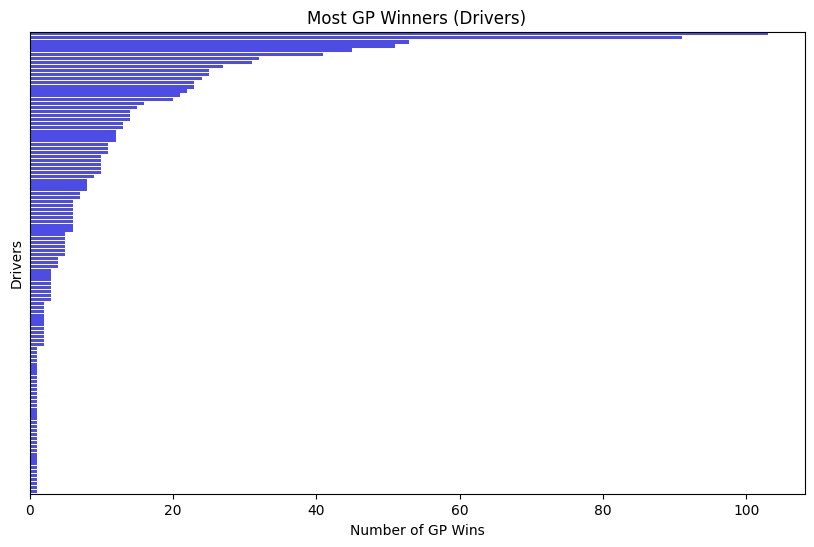

In [50]:
# Plotting Barplot for most gp(Grand Prix) winners (drivers)

driver_winners=final_df.loc[final_df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#BarPlot

sns.barplot(data=driver_winners,y='driver',x='positionOrder',color='blue',alpha=0.8)
plt.title('Most GP Winners (Drivers)')
plt.ylabel('Drivers')
plt.xlabel('Number of GP Wins')
plt.yticks([])

We can infer that there are around 6 drivers with wins more than 40!

In [51]:
# Top 10 Drivers

top10Drivers=driver_winners.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4      max_verstappen             45
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


Text(0.5, 0, 'Number of GP wins')

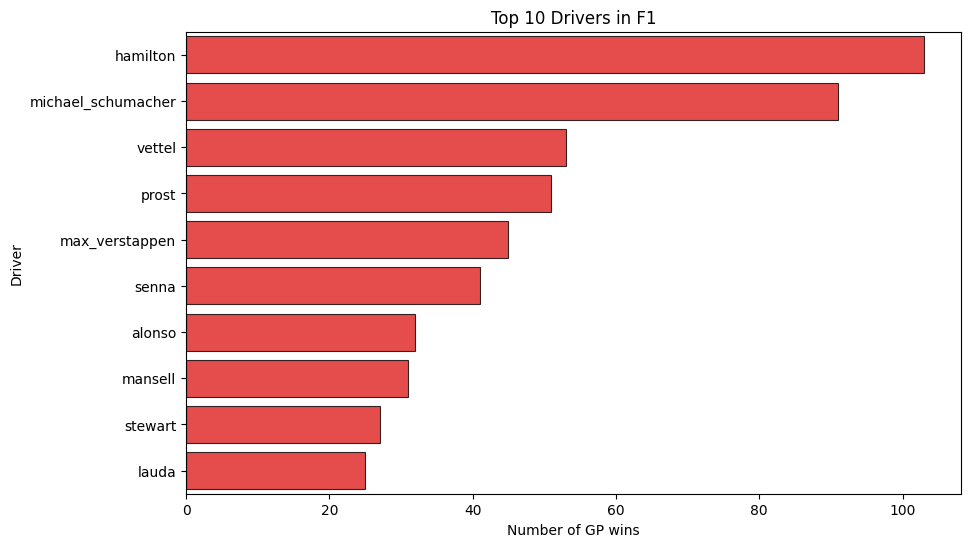

In [52]:
# Plotting Barplot for top 10 winners (drivers)

sns.barplot(data=top10Drivers,y='driver', x='positionOrder',color='red',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title('Top 10 Drivers in F1')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins')

([], [])

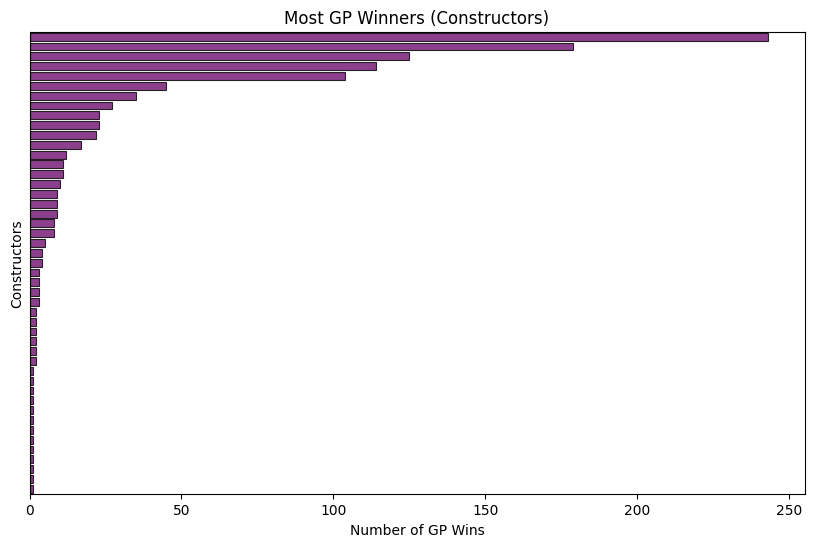

In [53]:
# Plotting Barplot for most gp (Grand Prix) winners (constructors)

constructor_winners=final_df.loc[final_df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Barplot

sns.barplot(data=constructor_winners,y='constructor_name',x='positionOrder',color='purple',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Most GP Winners (Constructors)')
plt.ylabel('Constructors')
plt.xlabel('Number of GP Wins')
plt.yticks([])

We can infer that there are around 5 constructors with wins more than 100!

In [54]:
# Top 10 Constructors

top10Constructors=constructor_winners.head(10)
print(top10Constructors)

  constructor_name  positionOrder
0          Ferrari            243
1          McLaren            179
2         Mercedes            125
3         Williams            114
4         Red Bull            104
5       Team Lotus             45
6          Renault             35
7         Benetton             27
8          Brabham             23
9          Tyrrell             23


Text(0.5, 0, 'Number of GP wins')

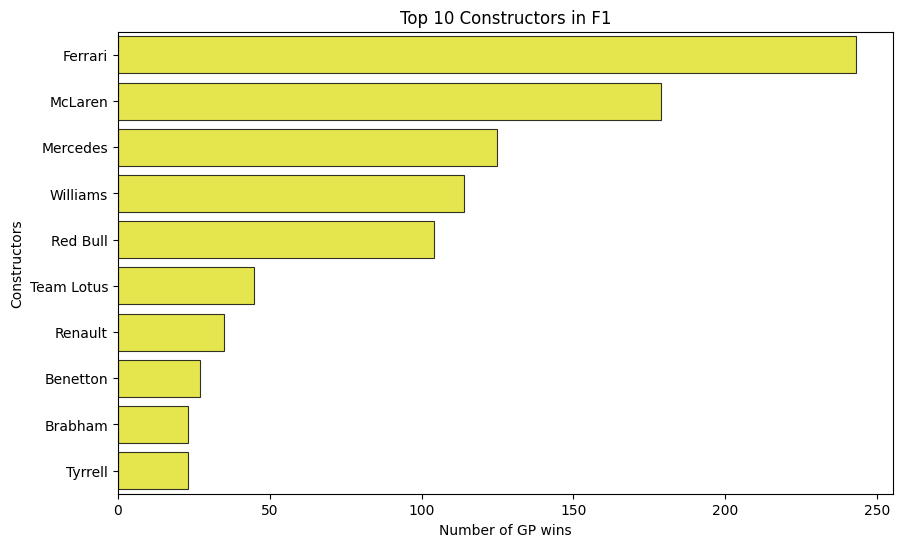

In [55]:
# Plotting Barplot for top 10 winners (constructors)

sns.barplot(data=top10Constructors,y='constructor_name', x='positionOrder',color='yellow',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title('Top 10 Constructors in F1')
plt.ylabel('Constructors')
plt.xlabel('Number of GP wins')

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.
1. As expected, we can see that there's a linear relationship between Start position and Finish position.
2. As per density of the graph, we can also infer that most of the races had less 25-30. Only few races had more than 30 races.

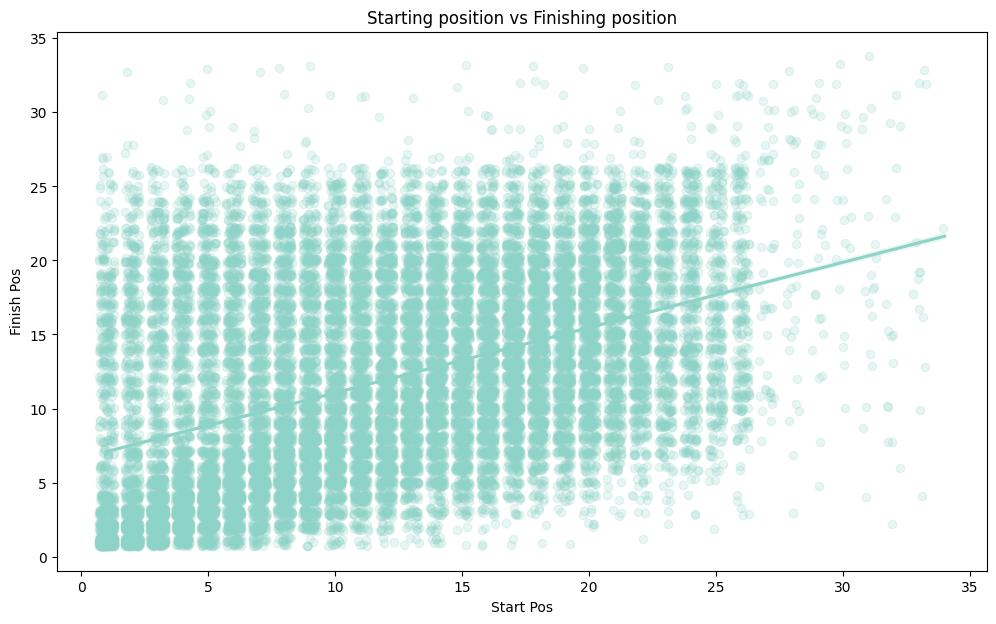

In [56]:
# Regression Plot for relationship between Start position and final position.

final_df_no_zero = final_df[final_df['grid']!=0]

plt.figure(figsize=[12,7])
sns.regplot(data=final_df_no_zero,x='grid',y='positionOrder',x_jitter=0.3,y_jitter=0.3,scatter_kws={'alpha':1/5});
plt.title('Starting position vs Finishing position')
plt.ylabel('Finish Pos')
plt.xlabel('Start Pos');

FacetGrid from Seaborn allows us to create a grid, on which we can map many other types of plots with minimal code, especially compared to using matplotlib. It is plotted to observe the average speeds during the fastest lap at individual GPs.
1. We can observe that the average speed are varied for different circuits.
2. Monaco Grand Prix which is generally a low speed track has low average speeds, whereas Italian Grand Prix (Monza) has high average speeds.

Text(0.5, 0.98, ' Average speed amongst all teams during the fastest lap at individual GPs')

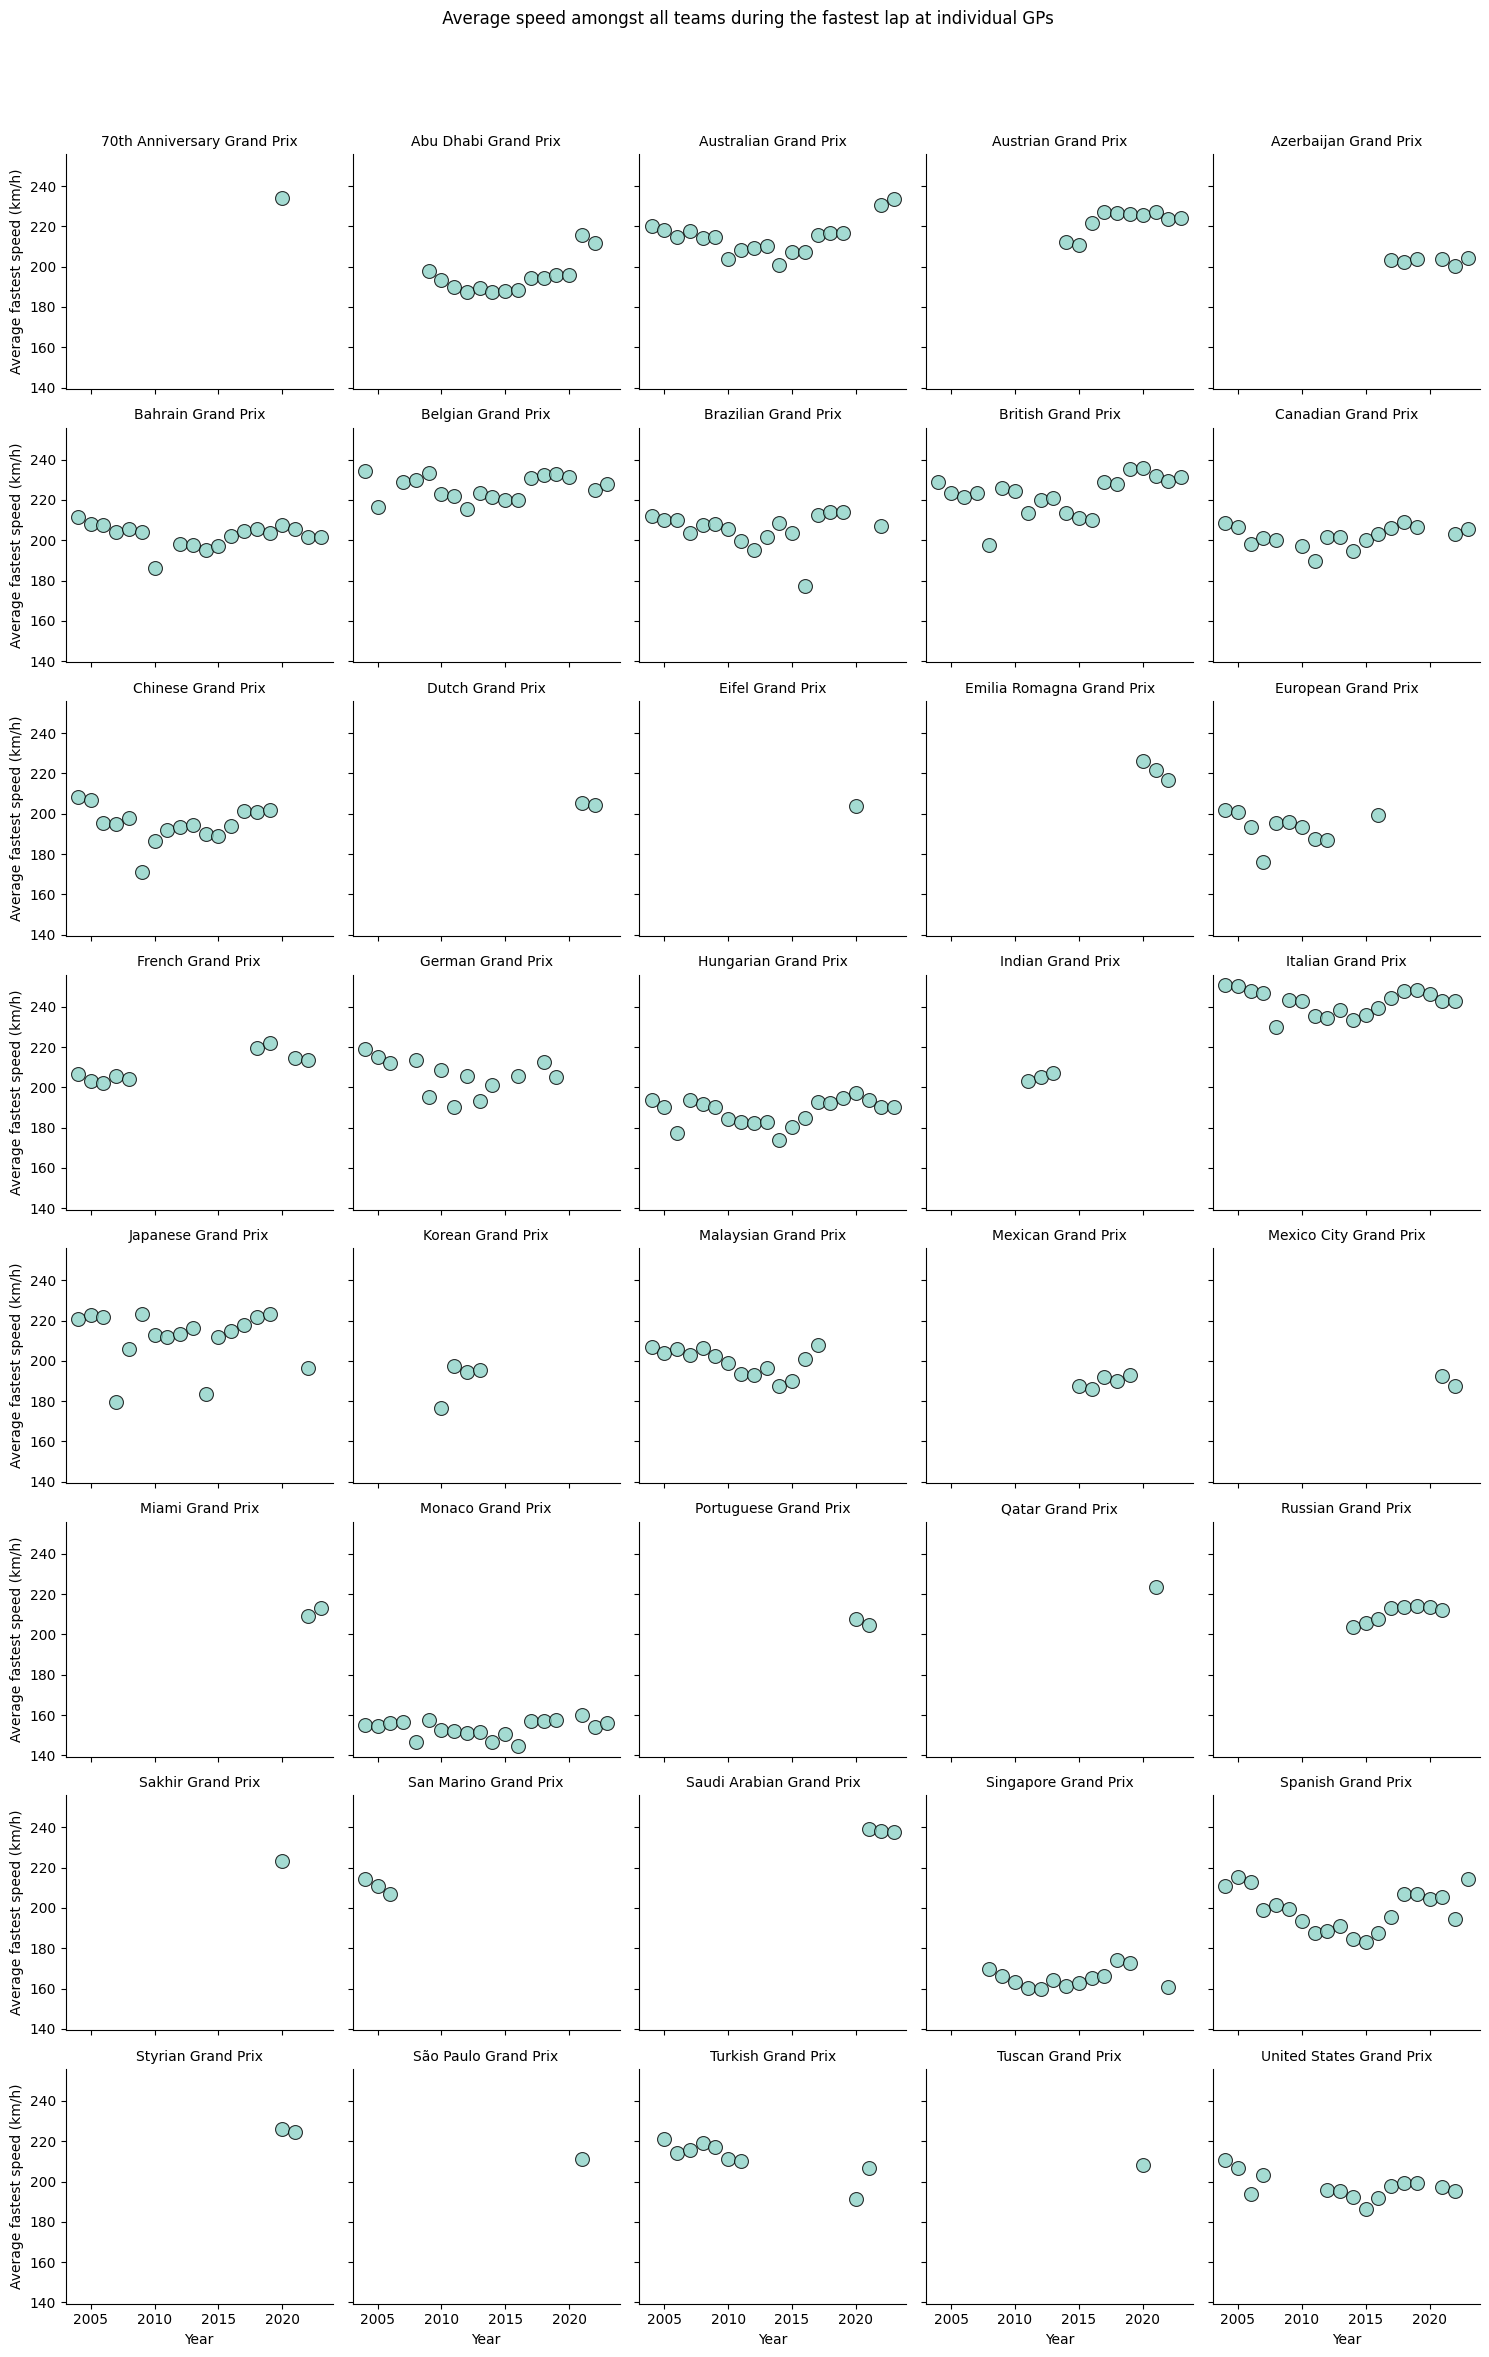

In [57]:
# Facetgrid plot for average speed amongst all teams during the fastest lap at individual GPs

final_df_speed=final_df[final_df['year']>=2004]
final_df_group_speed=final_df_speed.groupby(['gp_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

graph=sns.FacetGrid(data=final_df_group_speed,col='gp_name',col_wrap=5)
graph.map(plt.scatter,'year','fastestLapSpeed',alpha=0.8,linewidth=.8,edgecolor='black',s=100)
graph.set_titles("{col_name}")
graph.set_xlabels('Year')
graph.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
graph.fig.suptitle(' Average speed amongst all teams during the fastest lap at individual GPs')